In [77]:
import numpy as np
import pandas as pd
import os

1.How to convert the index of a series into a column of a dataframe?  

In [8]:
mylist = list('chitychitybangbang')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)

In [9]:
pd.DataFrame(ser.index)

,0
0,c
1,h
2,i
3,t
4,y
5,b
6,a
7,n
8,g


2.How to get the items of series A not present in series B?

In [4]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [22]:
boolean = ser1.isin(ser2)

In [23]:
np.invert(boolean)

0     True
1     True
2     True
3    False
4    False
dtype: bool

In [25]:
ser1.where(np.invert(boolean)).dropna()

0    1.0
1    2.0
2    3.0
dtype: float64

3.How to get frequency counts of unique items of a series?

In [35]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))

In [41]:
ser.value_counts()

c    8
a    5
d    5
h    4
e    3
f    2
b    2
g    1
dtype: int64

4.How to convert a numpy array to a dataframe of given shape?

In [177]:
ser = pd.Series(np.random.randint(1, 10, 35))

You can specify any shape that accumulates all the values in it using np.reshape method

In [67]:
np.random.randint(1, 10, 35).reshape(7,5)

array([[9, 1, 5, 3, 7],
       [4, 6, 1, 4, 2],
       [9, 7, 3, 1, 9],
       [8, 9, 7, 3, 2],
       [4, 6, 8, 1, 4],
       [8, 7, 4, 8, 4],
       [3, 8, 4, 4, 8]])

In [72]:
pd.DataFrame(np.random.randint(1, 10, 35).reshape(7,5),index=np.arange(7),columns=np.arange(5))

,0,1,2,3,4
0,1,7,6,9,4
1,3,3,5,5,4
2,2,8,5,5,7
3,7,7,1,3,9
4,5,2,8,5,2
5,7,9,7,5,4
6,3,6,5,2,2


5.Calculate the Mean Square Error on a truth and predicted series?

In [47]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

In [50]:
truth

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [49]:
pred

0    0.764060
1    1.839340
2    2.331681
3    3.222743
4    4.037718
5    5.887119
6    6.237935
7    7.759236
8    8.907843
9    9.378324
dtype: float64

In [52]:
mse = np.square(np.subtract(truth,pred)).mean() 

In [56]:
mse

0.38366693821223224

In [54]:
# let's calculate mse using sklearn library and see whether we calculated is same or not
from sklearn.metrics import mean_squared_error

In [55]:
mean_squared_error(truth,pred)

0.38366693821223224

# CRUD operations on Mongo DB or Postgres using any backend framework(flask or Django)

### I have used MongoDB and Flask

In [24]:
import os
os.chdir('C:/Users/admin/Documents/Python Files/flask/Appscrip')
os.getcwd()

'C:\\Users\\admin\\Documents\\Python Files\\flask\\Appscrip'

### start the mongoDB engine and mention the port number in below code, if it is '27017' then there's no need to change.

In [115]:
from flask import Flask,request,render_template
from flask_pymongo import PyMongo
from pymongo import MongoClient
import time
app= Flask(__name__)
Channel = MongoClient(port=27017)
db = Channel['Appscrip_game'] 
app.config["MONGO_URI"] = "mongodb://localhost:27017/Appscrip_game"
db = PyMongo(app)
username = None
best_cricketer = None
national_flag = None
@app.route('/')
def index():
    return render_template('index.html')
@app.route('/best_cricketer')
def best_cricketer():
    global username
    username= request.args.get('username')
    return render_template('best_cricketer.html')
@app.route('/national_flag')
def national_flag():
    global best_cricketer
    if request.values.get('S')!=None:
        best_cricketer = request.values.get('S')
    if request.values.get('V')!=None:
        best_cricketer = request.values.get('V')
    if request.values.get('A')!=None:
        best_cricketer = request.values.get('A')
    if request.values.get('J')!=None:
        best_cricketer = request.values.get('J')
    return render_template('national_flag.html')
@app.route('/summary')
def summary():
    global national_flag
    national_flag = request.values.getlist('check')
    game1 = {'Date_Time': time.strftime("%dth %B %H:%M %p"),'username':username, 'best_cricketer':best_cricketer, 'national_flag':national_flag}
    db.db.users.insert(game1)
    return render_template('summary.html',username=username, best_cricketer=best_cricketer, national_flag=national_flag)
@app.route('/history')
def history():
    db = Channel['Appscrip_game'] 
    users = db['users']
    data = users.find({})
    return render_template('history.html',data = data)
if __name__ == '__main__':
    app.debug = False
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Oct/2019 22:58:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2019 22:58:56] "GET /best_cricketer?username=askjbxk HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2019 22:58:59] "GET /national_flag?V=Virat+Kohli HTTP/1.1" 200 -
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
127.0.0.1 - - [06/Oct/2019 22:59:02] "GET /summary?check=Yellow HTTP/1.1" 200 -


{'Date_Time': '06th October 22:59 PM', 'username': 'askjbxk', 'best_cricketer': 'Virat Kohli', 'national_flag': ['Yellow']}


127.0.0.1 - - [06/Oct/2019 22:59:03] "GET /history HTTP/1.1" 200 -


# Part - 2 (Data Science)

In [140]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [179]:
train = pd.read_csv('C:/Users/admin/Downloads/sample_data/sample_train.csv',index_col='Unnamed: 0')
train.head()

,Alcoholic_beverage_no,Eloquence_average,Eloquence_high,Looks_repulsive,Alcoholic_beverage_yes,Money_spent_little,Money_spent_lots,Looks_handsome
0,0,0,1,0,1,0,1,1
1,0,0,0,0,1,1,0,1
2,1,1,0,0,0,0,1,1
3,1,1,0,1,0,1,0,0
4,0,0,0,1,1,0,1,0


In [180]:
test = pd.read_csv('C:/Users/admin/Downloads/sample_data/sample_test.csv',index_col='Unnamed: 0')
test.head()

,Alcoholic_beverage_no,Eloquence_average,Eloquence_high,Looks_repulsive,Alcoholic_beverage_yes,Money_spent_little,Money_spent_lots,Looks_handsome
0,1,1,0,0,0,0,1,1
1,0,0,1,0,1,1,0,1
2,0,1,0,1,1,0,1,0


In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 8 columns):
Alcoholic_beverage_no     7 non-null int64
Eloquence_average         7 non-null int64
Eloquence_high            7 non-null int64
Looks_repulsive           7 non-null int64
Alcoholic_beverage_yes    7 non-null int64
Money_spent_little        7 non-null int64
Money_spent_lots          7 non-null int64
Looks_handsome            7 non-null int64
dtypes: int64(8)
memory usage: 504.0 bytes


In [182]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 8 columns):
Alcoholic_beverage_no     3 non-null int64
Eloquence_average         3 non-null int64
Eloquence_high            3 non-null int64
Looks_repulsive           3 non-null int64
Alcoholic_beverage_yes    3 non-null int64
Money_spent_little        3 non-null int64
Money_spent_lots          3 non-null int64
Looks_handsome            3 non-null int64
dtypes: int64(8)
memory usage: 216.0 bytes


In [183]:
cat_var  = train.columns

In [184]:
train[cat_var]=train[cat_var].apply(lambda x: x.astype('category') )
test[cat_var]=test[cat_var].apply(lambda x: x.astype('category') )

In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 8 columns):
Alcoholic_beverage_no     7 non-null category
Eloquence_average         7 non-null category
Eloquence_high            7 non-null category
Looks_repulsive           7 non-null category
Alcoholic_beverage_yes    7 non-null category
Money_spent_little        7 non-null category
Money_spent_lots          7 non-null category
Looks_handsome            7 non-null category
dtypes: category(8)
memory usage: 880.0 bytes


In [186]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 8 columns):
Alcoholic_beverage_no     3 non-null category
Eloquence_average         3 non-null category
Eloquence_high            3 non-null category
Looks_repulsive           3 non-null category
Alcoholic_beverage_yes    3 non-null category
Money_spent_little        3 non-null category
Money_spent_lots          3 non-null category
Looks_handsome            3 non-null category
dtypes: category(8)
memory usage: 816.0 bytes


#### There's is no target coloumn, so we will add it manually

In [187]:
train['second_date'] = [0,1,0,1,1,1,0]

In [188]:
train.head()

,Alcoholic_beverage_no,Eloquence_average,Eloquence_high,Looks_repulsive,Alcoholic_beverage_yes,Money_spent_little,Money_spent_lots,Looks_handsome,second_date
0,0,0,1,0,1,0,1,1,0
1,0,0,0,0,1,1,0,1,1
2,1,1,0,0,0,0,1,1,0
3,1,1,0,1,0,1,0,0,1
4,0,0,0,1,1,0,1,0,1


In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
Alcoholic_beverage_no     7 non-null category
Eloquence_average         7 non-null category
Eloquence_high            7 non-null category
Looks_repulsive           7 non-null category
Alcoholic_beverage_yes    7 non-null category
Money_spent_little        7 non-null category
Money_spent_lots          7 non-null category
Looks_handsome            7 non-null category
second_date               7 non-null int64
dtypes: category(8), int64(1)
memory usage: 936.0 bytes


In [190]:
train['second_date'] = train['second_date'].astype('category')

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
Alcoholic_beverage_no     7 non-null category
Eloquence_average         7 non-null category
Eloquence_high            7 non-null category
Looks_repulsive           7 non-null category
Alcoholic_beverage_yes    7 non-null category
Money_spent_little        7 non-null category
Money_spent_lots          7 non-null category
Looks_handsome            7 non-null category
second_date               7 non-null category
dtypes: category(9)
memory usage: 983.0 bytes


In [192]:
y = train['second_date']

In [193]:
train_df=train.drop(['second_date'],axis=1)

In [194]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(train_df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [195]:
# Download and mention the path for graphviz
os.environ["PATH"] += os.pathsep + 'C:/Users/admin/Downloads/graphviz-2.38/release/bin'

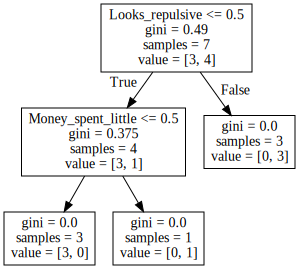

In [196]:
# let's visualize decision tree made my sklearn library 
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, feature_names=train_df.columns)  
graph = graphviz.Source(dot_data)  
graph

#### Constructing a Decision tree classifier with impurity score as 'gini' impurity, step by step using formulas

#### Choosing the top root node
gini_impurity = 1-(probability of yes)^2-(probability of no)^2

In [237]:
# defining a function to calculate gini impurity scores 
def gini(column_name):
    number_of_yes = train.loc [ train [column_name ] ==0]['second_date'].value_counts()[1]
    number_of_no = train.loc [ train [column_name ] ==0]['second_date'].value_counts()[0]
    total_0 = number_of_yes+number_of_no
    gini_impurity_0 = 1- np.square(number_of_yes/total_0)-np.square(number_of_no/total_0)
    number_of_yes = train.loc [ train [column_name ] ==1]['second_date'].value_counts()[1]
    number_of_no = train.loc [ train [column_name ] ==1]['second_date'].value_counts()[0]
    total_1 = number_of_yes+number_of_no
    gini_impurity_1 = 1- np.square(number_of_yes/total_1)-np.square(number_of_no/total_1)
    gini_impurity_score = ((total_1/7)*gini_impurity_1) + ((total_0/7)*gini_impurity_0) 
    return gini_impurity_score

In [209]:
train.columns

Index(['Alcoholic_beverage_no', 'Eloquence_average', 'Eloquence_high',
       'Looks_repulsive', 'Alcoholic_beverage_yes', 'Money_spent_little',
       'Money_spent_lots', 'Looks_handsome', 'second_date'],
      dtype='object')

In [207]:
gini('Alcoholic_beverage_no')

0.4857142857142857

In [210]:
gini('Eloquence_average')

0.40476190476190477

In [211]:
gini('Eloquence_high')

0.4857142857142857

In [212]:
gini('Looks_repulsive')

0.21428571428571427

In [213]:
gini('Alcoholic_beverage_yes')

0.4857142857142857

In [214]:
gini('Money_spent_little')

0.34285714285714286

In [215]:
gini('Money_spent_lots')

0.34285714285714286

In [216]:
gini('Looks_handsome')

0.21428571428571427

#### So, looking at above gini impurity scores for all columns, 'Looks_repulsive' and 'Looks_handsome' have same scores and they are lowest amongst all of scores. Therefore, we can use any of them as our root node.

#### let's take 'Looks_repulsive' as our root node

In [222]:
# So, using root node we divide into 2 groups '0' for false and '1' for true
train[train['Looks_repulsive']==1]['second_date']

3    1
4    1
5    1
Name: second_date, dtype: category
Categories (2, int64): [0, 1]

In [220]:
train[train['Looks_repulsive']==0]['second_date']

0    0
1    1
2    0
6    0
Name: second_date, dtype: category
Categories (2, int64): [0, 1]

#### So, from above 2 cell we see that '1' for true group has no impurity i.e all values are 1's and '0' for false group has impurity in it. So, let's divide further this false group using gini impurity. the  '1' for true group will become as leaf node.

In [223]:
train[train['Looks_repulsive']==0]

,Alcoholic_beverage_no,Eloquence_average,Eloquence_high,Looks_repulsive,Alcoholic_beverage_yes,Money_spent_little,Money_spent_lots,Looks_handsome,second_date
0,0,0,1,0,1,0,1,1,0
1,0,0,0,0,1,1,0,1,1
2,1,1,0,0,0,0,1,1,0
6,0,1,0,0,1,0,1,1,0


In [225]:
# assign this divided data to train for further removing impurities
train = train[train['Looks_repulsive']==0]

In [226]:
train.columns

Index(['Alcoholic_beverage_no', 'Eloquence_average', 'Eloquence_high',
       'Looks_repulsive', 'Alcoholic_beverage_yes', 'Money_spent_little',
       'Money_spent_lots', 'Looks_handsome', 'second_date'],
      dtype='object')

#### we will calculate gini impurity scores for all columns except 'Looks_repulsive'. because it is our root node

In [234]:
gini('Alcoholic_beverage_no')

0.19047619047619047

In [227]:
gini('Eloquence_average')

0.14285714285714285

In [228]:
gini('Eloquence_high')

0.19047619047619047

In [230]:
gini('Alcoholic_beverage_yes')

0.19047619047619047

In [231]:
gini('Money_spent_little')

0.0

In [232]:
gini('Money_spent_lots')

0.0

In [233]:
gini('Looks_handsome')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


nan

#### So, looking at above gini impurity scores for all columns except for 'Looks_repulsive', 'Money_spent_little' and 'Money_spent_lots' have same scores and they are lowest amongst all of scores. Therefore, we can use any of them as our internal node.¶

#### let's take 'Money_spent_little' as our internal node

In [235]:
# So, using internal node we divide into 2 groups '0' for false and '1' for true
train[train['Money_spent_little']==1]['second_date']

1    1
Name: second_date, dtype: category
Categories (2, int64): [0, 1]

In [236]:
train[train['Money_spent_little']==0]['second_date']

0    0
2    0
6    0
Name: second_date, dtype: category
Categories (2, int64): [0, 1]

#### So, from above 2 cell we see that both '1' for true group and '0' for false group has no impurity in them. thus both these nodes will become as leaf node. thus we have implemented a decision tree classifier